In [9]:
# Importing relevant libraries and reading in the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
df=pd.read_csv('b_17.csv')


# Question 1.a

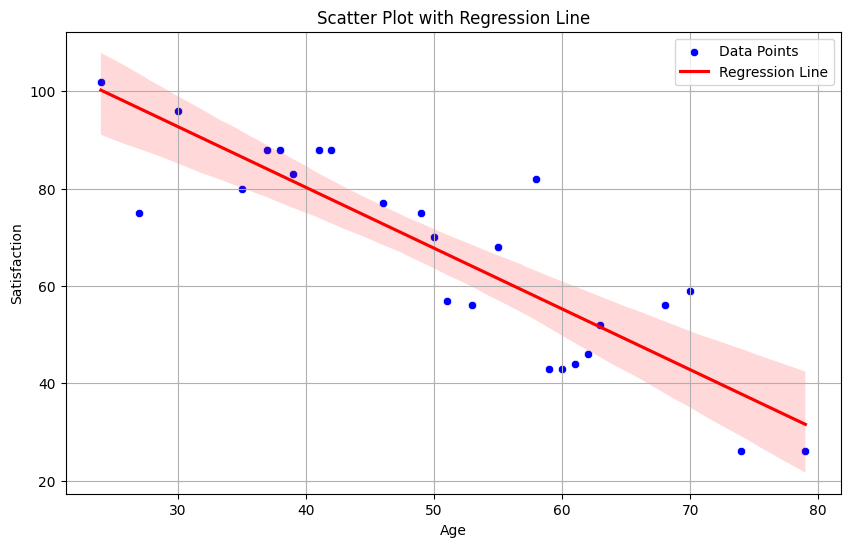

In [6]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='Age', y='Satisfaction', data=df, color='blue', label='Data Points')

# Adding a regression line
sns.regplot(x='Age', y='Satisfaction', data=df, scatter=False, color='red', label='Regression Line')

# Customizing the plot
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Age')
plt.ylabel('Satisfaction')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Question 1.b

In [8]:
# Defining the independent variable (X) and the dependent variable (y)
X = df['Age']
y = df['Satisfaction']

# Adding a constant term to the independent variable (X) for the intercept
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Printing the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     72.09
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.52e-08
Time:                        09:41:56   Log-Likelihood:                -93.623
No. Observations:                  25   AIC:                             191.2
Df Residuals:                      23   BIC:                             193.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.2209      7.778     16.743      0.0

# Question 1.c

In [15]:
df.rename(columns={'Surgical-Medical': 'Surgical_Medical'}, inplace=True)

# Defining a formula for the ANOVA analysis
formula = 'Satisfaction ~ Age + Severity + C(Surgical_Medical) + Anxiety'

# Creating a model for the ANOVA analysis
model = ols(formula, data=df).fit()

# Computing the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Printing the ANOVA table
print(anova_table)


                          sum_sq    df          F    PR(>F)
C(Surgical_Medical)    28.449455   1.0   0.289042  0.596767
Age                  3545.147588   1.0  36.018177  0.000007
Severity              624.103110   1.0   6.340796  0.020428
Anxiety                70.989563   1.0   0.721243  0.405788
Residual             1968.532513  20.0        NaN       NaN


# Question 1.d

In [19]:
# Defining variables
independent_variable = 'Age'
mediator_variable = 'Severity'
dependent_variable = 'Satisfaction'

# Creating a DataFrame with the necessary variables
data = df[[independent_variable, mediator_variable, dependent_variable]]

# Step 1: Fitting the regression model for the mediator (Path A)
X = data[independent_variable]
X = sm.add_constant(X)
mediator_model = sm.OLS(data[mediator_variable], X).fit()

# Step 2: Getting the indirect effect (Path A * Path B)
indirect_effect = mediator_model.params[independent_variable] * \
                  sm.OLS(data[dependent_variable], sm.add_constant(mediator_model.predict(X))).fit().params[0]

# Step 3: Fitting the regression model for the dependent variable with both the independent and mediator (Path C)
direct_model = sm.OLS(data[dependent_variable], sm.add_constant(data[[independent_variable, mediator_variable]])).fit()

# Step 4: Getting the direct effect (Path C')
direct_effect = direct_model.params[independent_variable]

# Step 5: Calculating the total effect (Path C)
total_effect = direct_effect + indirect_effect

# Step 6: Computing the Sobel test statistic for mediation
standard_error = ((mediator_model.bse[independent_variable] ** 2) * (direct_effect ** 2) +
                  (direct_model.bse[independent_variable] ** 2) * (indirect_effect ** 2)) ** 0.5
sobel_test_statistic = indirect_effect / standard_error

# Step 7: Calculating the p-value for the Sobel test
from scipy.stats import norm
sobel_p_value = 2 * (1 - norm.cdf(abs(sobel_test_statistic)))

# Printing the results
print(f"Indirect Effect: {indirect_effect:.4f}")
print(f"Direct Effect: {direct_effect:.4f}")
print(f"Total Effect: {total_effect:.4f}")
print(f"Sobel Test Statistic: {sobel_test_statistic:.4f}")
print(f"Sobel p-value: {sobel_p_value:.4f}")

Indirect Effect: -1.2490
Direct Effect: -1.0462
Total Effect: -2.2952
Sobel Test Statistic: -4.8951
Sobel p-value: 0.0000


# Question 1.e

The y-intercept, in this context, doesn't provide meaningful information because setting the Age variable to zero is often not meaningful or realistic.

## Question 1.f

In [21]:
# Calculating the coefficient of variation for the 'Age' variable
cv_age = (df['Age'].std() / df['Age'].mean()) * 100  # Multiply by 100 to express as a percentage

# Interpretation
print(f"The coefficient of variation for Age is {cv_age:.2f}%.")

if cv_age < 10:
    interpretation = "Low variability"
elif 10 <= cv_age < 30:
    interpretation = "Moderate variability"
else:
    interpretation = "High variability"

print(f"Interpretation: {interpretation}")


The coefficient of variation for Age is 29.13%.
Interpretation: Moderate variability


## Question 1.g

In [26]:
# Defining your independent variable and dependent variable
independent_variable = 'Age'
dependent_variable = 'Satisfaction'

# Creating a linear regression model
X = df[independent_variable]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = df[dependent_variable]

model = sm.OLS(y, X).fit()

# Computing the 98% confidence interval for the slope
confidence_interval = model.conf_int(alpha=0.02)  # 0.02 corresponds to a 98% confidence level

# Geting the lower and upper bounds of the confidence interval
lower_bound, upper_bound = confidence_interval.loc[independent_variable]

# Printing the results
print(f"98% Confidence Interval for the Slope of {independent_variable}:")
print(f"Lower Bound: {lower_bound:.4f}")
print(f"Upper Bound: {upper_bound:.4f}")
print("\n")
print("We are 98 percent confident that the effect of 'Age'\n on 'Satisfaction' falls within this interval.")
print("\n")
print("The slope coefficient from the regression equation is\n-1.2490. This means that for each one-unit increase in 'Age,'\n the 'Satisfaction' score decreases by approximately \n1.2490 units on average.")
print("\n")
print("he slope of the regression equation (-1.2490) is inside \nthe 98% confidence interval (-1.6168 to -0.8813), confirming that \nthe relationship between 'Age' and 'Satisfaction' \nis statistically significant and negative.")

98% Confidence Interval for the Slope of Age:
Lower Bound: -1.6168
Upper Bound: -0.8813


We are 98 percent confident that the effect of 'Age'
 on 'Satisfaction' falls within this interval.


The slope coefficient from the regression equation is
-1.2490. This means that for each one-unit increase in 'Age,'
 the 'Satisfaction' score decreases by approximately 
1.2490 units on average.


he slope of the regression equation (-1.2490) is inside 
the 98% confidence interval (-1.6168 to -0.8813), confirming that 
the relationship between 'Age' and 'Satisfaction' 
is statistically significant and negative.


## Question 1.h

In [29]:
# Defining independent variable and dependent variable
independent_variable = 'Age'
dependent_variable = 'Satisfaction'

# Specifying the value of 'Age' for which we want to compute the confidence interval
age_value = 40  # Replace with the desired age value

# Creating a linear regression model
X = df[independent_variable]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = df[dependent_variable]

model = sm.OLS(y, X).fit()

# Predicting the average 'Satisfaction' value at the specified 'Age' value
predicted_value = model.predict([1, age_value])

# Computing the standard error of the prediction
mse = model.mse_resid  # Mean squared error
n = len(df)
standard_error = (mse * (1 + (1 / n) + ((age_value - df[independent_variable].mean()) ** 2) / ((n - 1) * df[independent_variable].var()))) ** 0.5

# Computing the 98% confidence interval
z_score = 2.33  # Corresponds to a 98% confidence level (assuming a normal distribution)
lower_bound = float(predicted_value - z_score * standard_error)
upper_bound = float(predicted_value + z_score * standard_error)

# Printing the results
print(f"98% Confidence Interval for Average 'Satisfaction' at Age {age_value}:")
print(f"Lower Bound: {lower_bound:.4f}")
print(f"Upper Bound: {upper_bound:.4f}")
print("\n")
print("We can conclude that the average 'Satisfaction' score for\n individuals aged 40 is likely to be within this range.")


98% Confidence Interval for Average 'Satisfaction' at Age 40:
Lower Bound: 54.6295
Upper Bound: 105.8896


We can conclude that the average 'Satisfaction' score for
 individuals aged 40 is likely to be within this range.


/var/folders/gq/l73fcf41067355zj79g9b5hm0000gn/T/ipykernel_22266/168317018.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lower_bound = float(predicted_value - z_score * standard_error)
/var/folders/gq/l73fcf41067355zj79g9b5hm0000gn/T/ipykernel_22266/168317018.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  upper_bound = float(predicted_value + z_score * standard_error)


# Question 1.i

In [34]:
import statsmodels.api as sm

# Defining the independent variable and dependent variable
independent_variable = 'Age'
dependent_variable = 'Satisfaction'

# Specifying the value of 'Age' for which we want to compute the prediction interval
age_value = 40  # Replace with the desired age value

# Creating a linear regression model
X = df[independent_variable]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = df[dependent_variable]

model = sm.OLS(y, X).fit()

# Predicting the 'Satisfaction' value at the specified 'Age' value
predicted_value = model.predict([1, age_value])

# Computing the standard error of the prediction
mse = model.mse_resid  # Mean squared error
n = len(df)
standard_error = (mse * (1 + (1 / n) + ((age_value - df[independent_variable].mean()) ** 2) / ((n - 1) * df[independent_variable].var()))) ** 0.5

# Computing the 99% prediction interval
z_score = 2.61  # Corresponds to a 99% prediction interval (assuming a normal distribution)
lower_bound = float(predicted_value - z_score * standard_error)
upper_bound = float(predicted_value + z_score * standard_error)

# Printing the results
print(f"99% Prediction Interval for 'Satisfaction' at Age {age_value}:")
print(f"Lower Bound: {lower_bound:.4f}")
print(f"Upper Bound: {upper_bound:.4f}")
print("\n")
print("if you were to encounter an individual aged 40,\n you can be reasonably confident that their \n'Satisfaction' score will be somewhere within\n the range of 51.5495 to 108.9696")
print("\n")

99% Prediction Interval for 'Satisfaction' at Age 40:
Lower Bound: 51.5495
Upper Bound: 108.9696


if you were to encounter an individual aged 40,
 you can be reasonably confident that their 
'Satisfaction' score will be somewhere within
 the range of 51.5495 to 108.9696




/var/folders/gq/l73fcf41067355zj79g9b5hm0000gn/T/ipykernel_22266/3658136111.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lower_bound = float(predicted_value - z_score * standard_error)
/var/folders/gq/l73fcf41067355zj79g9b5hm0000gn/T/ipykernel_22266/3658136111.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  upper_bound = float(predicted_value + z_score * standard_error)


## Questio 2.a

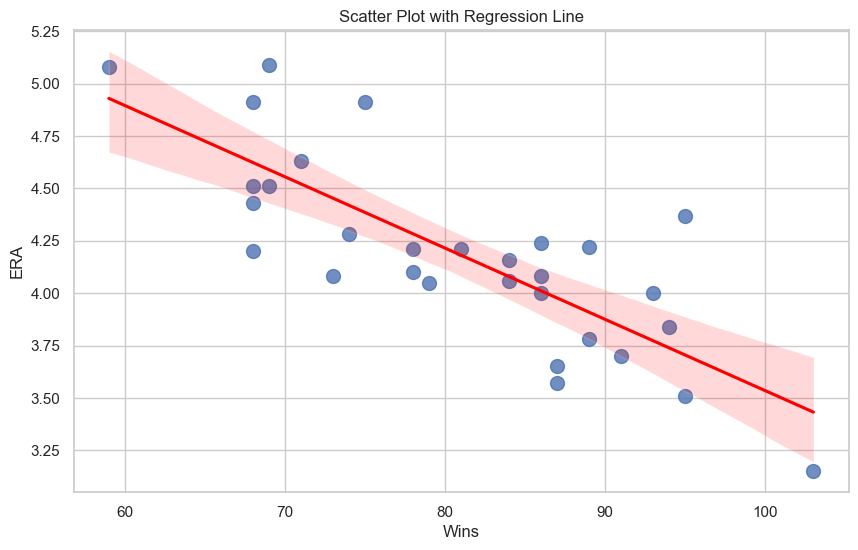

In [37]:
## Reading in table b_22
df=pd.read_csv('b_22.csv')

# Setting the style of the plot
sns.set(style="whitegrid")

# Creating a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Wins', y='ERA', data=df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Wins')
plt.ylabel('ERA')
plt.grid(True)

# Showing the plot
plt.show()

## Question 2.b

In [40]:
from scipy import stats
# Extracting the 'Wins' and 'ERA' columns from table
x = df['Wins']
y = df['ERA']

# Performing linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Creating a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Calculating the predicted values for the regression line
predicted_y = regression_line(x)

# Printing the slope, intercept, and correlation coefficient (r-value)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation Coefficient (r-value): {r_value}")

Slope: -0.034031266095070734
Intercept: 6.937462760424556
Correlation Coefficient (r-value): -0.7961123255322091


# Question 2.c

In [41]:
# Creating a linear regression model
model = ols('ERA ~ Wins', data=df).fit()

# Performing ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Printing the ANOVA table
print(anova_table)

            sum_sq    df          F        PR(>F)
Wins      3.822630   1.0  48.459872  1.437582e-07
Residual  2.208707  28.0        NaN           NaN


## Question 2.d

In [45]:
import pandas as pd
import statsmodels.api as sm

# Step 1: Creating a DataFrame with the relevant columns
data = df[['Wins', 'ERA', 'Batter Age']]

# Step 2: Renaming columns for convenience
data.columns = ['IV', 'DV', 'Mediator']

# Step 3: Performing the mediation analysis (IV -> DV)
mediation_model = sm.OLS.from_formula("DV ~ IV", data=data).fit()
mediation_result = mediation_model.summary()

# Step 4: Printing the results of the direct effect analysis
print("Step 4: Direct Effect Analysis (IV -> DV)")
print(mediation_result)

# Step 5: Performing the mediation analysis (IV -> Mediator -> DV)
mediation_model_with_mediator = sm.OLS.from_formula("DV ~ IV + Mediator", data=data).fit()
mediation_result_with_mediator = mediation_model_with_mediator.summary()

# Step 6: Printing the results of the mediation analysis
print("\nStep 6: Mediation Analysis (IV -> Mediator -> DV)")
print(mediation_result_with_mediator)

# Step 7: Checking to see if the mediator has a significant effect on the relationship
mediator_summary = mediation_result_with_mediator.tables[1]
mediator_p_value = float(mediator_summary.data[1][3])  # Convert p-value to float

# Step 8: Determining the existence of an indirect linear relationship
if mediator_p_value < 0.05:
    print("\nStep 8: Mediator ('Batter Age') has a significant effect.")
    print("There is evidence of an indirect linear relationship.")
else:
    print("\nStep 8: Mediator ('Batter Age') does not have a significant effect.")
    print("There may not be a significant indirect linear relationship.")


Step 4: Direct Effect Analysis (IV -> DV)
                            OLS Regression Results                            
Dep. Variable:                     DV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     48.46
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.44e-07
Time:                        10:14:43   Log-Likelihood:                -3.4363
No. Observations:                  30   AIC:                             10.87
Df Residuals:                      28   BIC:                             13.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

# Question 2.e

The value of the y-intercept (Intercept) in the direct effect analysis (IV -> DV) does have a meaningful interpretation. For each additional win, 'ERA' decreases by approximately 0.0340. This coefficient provides a more interpretable understanding of the relationship between 'Wins' and 'ERA'.

# Question 2.f

In [47]:
import numpy as np

# Calculating the mean and standard deviation of 'ERA'
mean_era = df['ERA'].mean()
std_era = df['ERA'].std()

# Calculating the coefficient of variation (CV)
cv_era = (std_era / mean_era) * 100

# Interpreting the meaning of the CV
print(f"The coefficient of variation (CV) for 'ERA' is {cv_era:.2f}%.")

if cv_era < 10:
    interpretation = "Low variation"
elif 10 <= cv_era < 30:
    interpretation = "Moderate variation"
else:
    interpretation = "High variation"

print(f"In the context of ERA, a CV of {cv_era:.2f}% indicates {interpretation}.")


The coefficient of variation (CV) for 'ERA' is 10.90%.
In the context of ERA, a CV of 10.90% indicates Moderate variation.


# Question 2.g

In [49]:
# Creating a DataFrame with the relevant columns
data = df[['Wins', 'ERA']]

# Renaming columns for convenience
data.columns = ['IV', 'DV']

# Performing linear regression
model = sm.OLS.from_formula("DV ~ IV", data=data).fit()

# Calculating the confidence interval for the slope (β₁) at the 97% confidence level
confidence_interval = model.conf_int(alpha=0.03)  # 97% confidence level

# Extracting the lower and upper bounds of the confidence interval
lower_bound = confidence_interval.iloc[1, 0]  # 1st row (slope), 1st column (lower bound)
upper_bound = confidence_interval.iloc[1, 1]  # 1st row (slope), 2nd column (upper bound)

# Printing the confidence interval
print(f"97% Confidence Interval for the Slope (β₁): ({lower_bound:.4f}, {upper_bound:.4f})")

97% Confidence Interval for the Slope (β₁): (-0.0452, -0.0229)


# Question 2.h

In [50]:
# Creating a DataFrame with the relevant columns
data = df[['Wins', 'ERA']]

# Renaming columns for convenience
data.columns = ['IV', 'DV']

# Performing linear regression
model = sm.OLS.from_formula("DV ~ IV", data=data).fit()

# Specifying the value of x₀
x_0 = 3.8

# Creating a DataFrame with x₀ as a constant value
x_0_df = pd.DataFrame({'IV': [x_0]})

# Predicting the average y value at x₀
y_hat = model.predict(x_0_df)

# Calculating the standard error of the prediction
# This includes both the standard error of the estimate and the prediction interval
se = np.sqrt(model.scale)

# Calculating the degrees of freedom
df = model.df_resid

# Calculating the t-statistic for a 97% confidence interval
t_value = stats.t.ppf(0.985, df)

# Calculating the margin of error
margin_of_error = t_value * se

# Calculating the lower and upper bounds of the confidence interval
lower_bound = y_hat - margin_of_error
upper_bound = y_hat + margin_of_error

# Printing the 97% confidence interval for the average y value at x₀
print(f"97% Confidence Interval for Average Y at x₀={x_0}: ({lower_bound[0]:.4f}, {upper_bound[0]:.4f})")

97% Confidence Interval for Average Y at x₀=3.8: (6.1660, 7.4503)


# Question 2.i

In [55]:
df=pd.read_csv('b_22.csv')
import statsmodels.api as sm

# Creating a DataFrame with the relevant columns
data = df[['Wins', 'ERA']]

# Renaming columns for convenience
data.columns = ['IV', 'DV']

# Performing linear regression
model = sm.OLS.from_formula("DV ~ IV", data=data).fit()

# Specifying the value of x₀
x_0 = 3.8

# Creating a DataFrame with x₀ as a constant value
x_0_df = pd.DataFrame({'IV': [x_0]})

# Getting the prediction interval for the average Y value at x₀
prediction_results = model.get_prediction(x_0_df)

# Extracting the prediction interval
prediction_interval = prediction_results.conf_int(alpha=0.03)  # 97% prediction interval

# Extracting the predicted Y value
predicted_y = prediction_results.predicted_mean

# Extracting the lower and upper bounds of the prediction interval
lower_bound = prediction_interval[0][0]  # Lower bound
upper_bound = prediction_interval[0][1]  # Upper bound

# Printing the 97% prediction interval for the average Y value at x₀
print(f"97% Prediction Interval for Average Y at x₀={x_0}: ({lower_bound:.4f}, {upper_bound:.4f})")


97% Prediction Interval for Average Y at x₀=3.8: (5.9384, 7.6778)
